Bloc 1 : Préparation et Génération des Données Synthétiques

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


N_SAMPLES = 300
N_CLASSES = 3
N_FEATURES = 4

labels_map = {0: "Chat", 1: "Poule", 2: "Chien"}

2. Génération Synthétique des Données

In [ ]:
def generate_synthetic_data(n_samples):

    X = []
    y = []


    X_chat = np.random.normal(loc=[0.15, 0.25, 0.15, 0.35], scale=0.1, size=(n_samples // 3, N_FEATURES))
    y_chat = np.zeros(n_samples // 3)

    
    X_poule = np.random.normal(loc=[0.45, 0.55, 0.45, 0.65], scale=0.1, size=(n_samples // 3, N_FEATURES))
    y_poule = np.ones(n_samples // 3)

    
    X_chien = np.random.normal(loc=[0.75, 0.85, 0.75, 0.95], scale=0.1, size=(n_samples - 2 * (n_samples // 3), N_FEATURES))
    y_chien = np.full(n_samples - 2 * (n_samples // 3), 2)

    # Concaténation des données
    X = np.concatenate((X_chat, X_poule, X_chien))
    y = np.concatenate((y_chat, y_poule, y_chien))

    # Mélange aléatoire (shuffle) des données
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = y[perm]


    X = np.clip(X, 0.0, 1.0)

    return X, y

# Génération des données
X_raw, y_labels = generate_synthetic_data(N_SAMPLES)

print(f"Forme des données X: {X_raw.shape} (N_échantillons, N_pixels)")
print(f"Forme des étiquettes y: {y_labels.shape}")
print(f"Exemple d'une image (4 pixels): {X_raw[0]}")
print(f"Label correspondant: {y_labels[0]} ({labels_map[y_labels[0]]})")

Forme des données X: (300, 4) (N_échantillons, N_pixels)
Forme des étiquettes y: (300,)
Exemple d'une image (4 pixels): [0.05910945 0.33000298 0.03234257 0.22966186]
Label correspondant: 0.0 (Chat)


Bloc 2 : Pré-traitement et Division des Données

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Taille de l'ensemble d'entraînement: {len(X_train_scaled)} échantillons")
print(f"Taille de l'ensemble de test: {len(X_test_scaled)} échantillons")


Taille de l'ensemble d'entraînement: 240 échantillons
Taille de l'ensemble de test: 60 échantillons


Bloc 3 : Modèle de Classification Scikit-learn

In [ ]:

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled) # Probabilités de chaque classe

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Bloc 4 : Évaluation du Modèle

In [ ]:
# 1. Calcul de la précision (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision (Accuracy) sur l'ensemble de test: {accuracy:.4f}")

# 2. Rapport de classification détaillé
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred, target_names=labels_map.values()))

# 3. Illustration des prédictions
print("\nQuelques exemples de prédictions sur l'ensemble de test:")
for i in range(5):
    pixels = X_test_scaled[i]
    pred_label = labels_map[y_pred[i]]
    true_label = labels_map[y_test[i]]

    
    probas = y_pred_proba[i]

    print(f"--- Échantillon {i+1} ---")
    print(f"Pixels mis à l'échelle: {pixels}")
    print(f"Vraie Classe: {true_label}")
    print(f"Probabilités (Chat, Poule, Chien): {[f'{p:.2f}' for p in probas]}")
    print(f"Prédiction du Modèle: {pred_label}")
    print("-" * 20)


Précision (Accuracy) sur l'ensemble de test: 1.0000

Rapport de Classification:
              precision    recall  f1-score   support

        Chat       1.00      1.00      1.00        20
       Poule       1.00      1.00      1.00        20
       Chien       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Quelques exemples de prédictions sur l'ensemble de test:
--- Échantillon 1 ---
Pixels mis à l'échelle: [-1.21926106 -0.59896895 -0.654358   -0.49997597]
Vraie Classe: Chat
Probabilités (Chat, Poule, Chien): ['0.79', '0.21', '0.00']
Prédiction du Modèle: Chat
--------------------
--- Échantillon 2 ---
Pixels mis à l'échelle: [-1.69271256 -1.19410718 -1.13781851 -1.33266004]
Vraie Classe: Chat
Probabilités (Chat, Poule, Chien): ['1.00', '0.00', '0.00']
Prédiction du Modèle: Chat
--------------------
--- Échantillon 3 ---
Pixels mis à

Bloc 5 : Visualisation des Données et des Prédictions

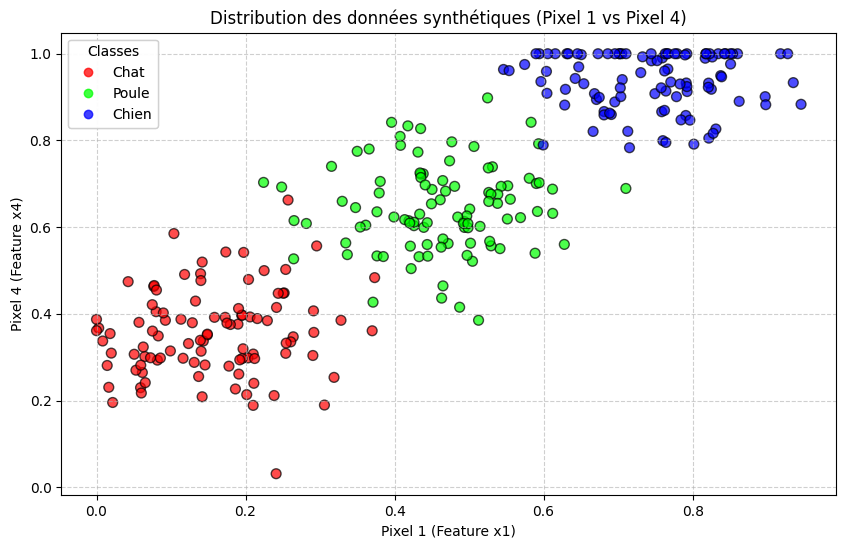

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


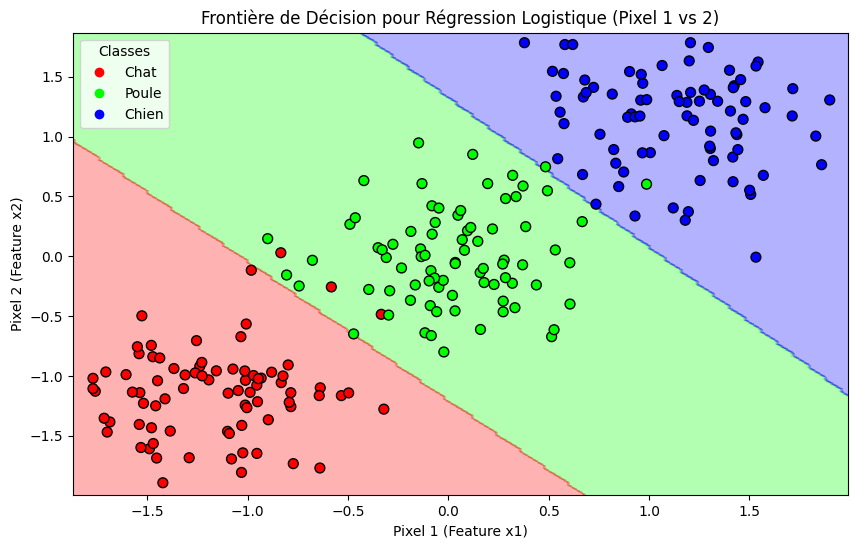

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cmap_scatter = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) # Rouge (Chat), Vert (Poule), Bleu (Chien)

plt.figure(figsize=(10, 6))
# Scatter plot des données brutes (non-scalées)
scatter = plt.scatter(X_raw[:, 0], X_raw[:, 3], c=y_labels, cmap=cmap_scatter, edgecolor='k', s=50, alpha=0.7)

plt.title("Distribution des données synthétiques (Pixel 1 vs Pixel 4)")
plt.xlabel("Pixel 1 (Feature x1)")
plt.ylabel("Pixel 4 (Feature x4)")

# Création de la légende manuelle
legend1 = plt.legend(handles=scatter.legend_elements()[0],
                     labels=['Chat', 'Poule', 'Chien'],
                     title="Classes")
plt.gca().add_artist(legend1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



def plot_decision_boundary(X, y, classifier, title):
    # Utiliser uniquement les deux premières features pour la visualisation
    X_plot = X[:, :2]

    # Entraîner un modèle pour la visualisation uniquement sur 2D
    # (pour ne pas perturber l'entraînement 4D précédent)
    classifier_2d = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
    classifier_2d.fit(X_plot, y)

    h = .02  # Step size in the mesh
    x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
    y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédiction sur la grille
    Z = classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))

    # Affichage de la frontière de décision
    plt.contourf(xx, yy, Z, cmap=cmap_scatter, alpha=0.3)

    # Affichage des points d'entraînement
    scatter_pts = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=cmap_scatter, edgecolor='k', s=50)

    plt.title(title)
    plt.xlabel("Pixel 1 (Feature x1)")
    plt.ylabel("Pixel 2 (Feature x2)")
    plt.legend(handles=scatter_pts.legend_elements()[0], labels=['Chat', 'Poule', 'Chien'], title="Classes")
    plt.show()

# Visualisation de la frontière de décision (entraînée sur Pixel 1 et Pixel 2)
plot_decision_boundary(X_train_scaled, y_train, model, "Frontière de Décision pour Régression Logistique (Pixel 1 vs 2)")

Bloc 1 : Création et Visualisation du Spiral Dataset

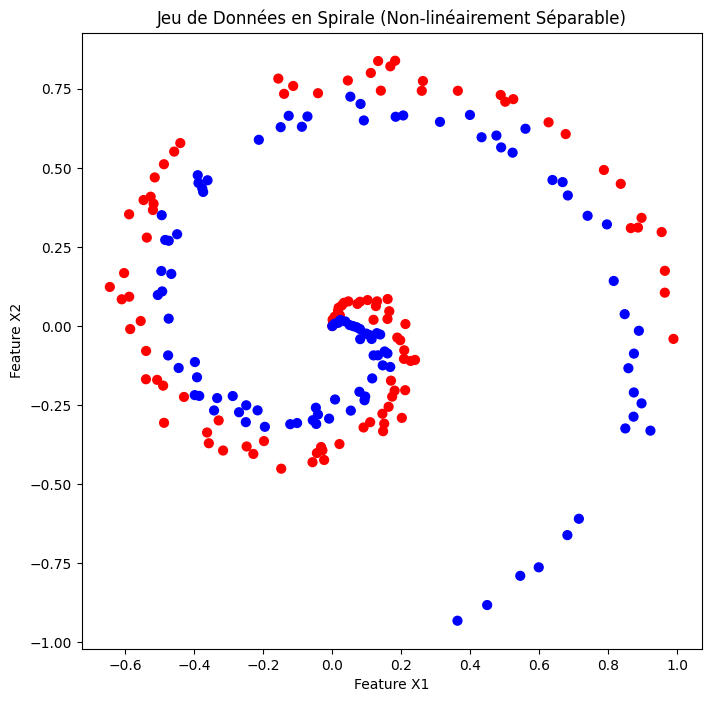

Forme des données: (200, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


def create_spiral_data(points_per_spiral, rotations, start_angle):
    """Génère deux ensembles de données en forme de spirale."""

    # Paramètres
    N = points_per_spiral
    K = 2 # Deux classes

    X = np.zeros((N * K, 2)) # Matrice des features (x, y)
    y = np.zeros(N * K, dtype='uint8') # Vecteur des labels (0 ou 1)

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        # Rayon : de 0 à 1 (avec un peu de bruit)
        r = np.linspace(0.0, 1, N)
        # Angle : augmente avec le rayon + décalage initial (start_angle) + bruit
        t = np.linspace(j * 4, (j + rotations) * 4, N) + np.random.randn(N) * 0.2 + start_angle * j

        # Conversion des coordonnées polaires (r, t) en coordonnées cartésiennes (x, y)
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j # Label de la classe

    return X, y

# Génération des données
N_POINTS = 100 # 100 points par classe
X_spiral, y_spiral = create_spiral_data(N_POINTS, rotations=2, start_angle=np.pi)

# -----------------
# 2. Visualisation
# -----------------
plt.figure(figsize=(8, 8))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=40, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title("Jeu de Données en Spirale (Non-linéairement Séparable)")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.show()

# -----------------
# 3. Pré-traitement (Standardisation)
# -----------------
# Nécessaire pour les modèles linéaires basés sur l'optimisation
scaler = StandardScaler()
X_spiral_scaled = scaler.fit_transform(X_spiral)

print(f"Forme des données: {X_spiral_scaled.shape}")

Bloc 2 : Entraînement et Évaluation de la Régression Logistique

In [ ]:

model_linear = LogisticRegression(solver='lbfgs', random_state=42)
model_linear.fit(X_spiral_scaled, y_spiral)

# 2. Prédictions
y_pred_linear = model_linear.predict(X_spiral_scaled)

# 3. Évaluation
accuracy_linear = accuracy_score(y_spiral, y_pred_linear)

print(f"Précision (Accuracy) de la Régression Logistique: {accuracy_linear:.4f}")
print("Une précision proche de 0.5 (50%) indique que le modèle est à peine meilleur que le hasard.")

Précision (Accuracy) de la Régression Logistique: 0.5400
Une précision proche de 0.5 (50%) indique que le modèle est à peine meilleur que le hasard.


Bloc 3 : Visualisation de la Frontière de Décision Linéaire

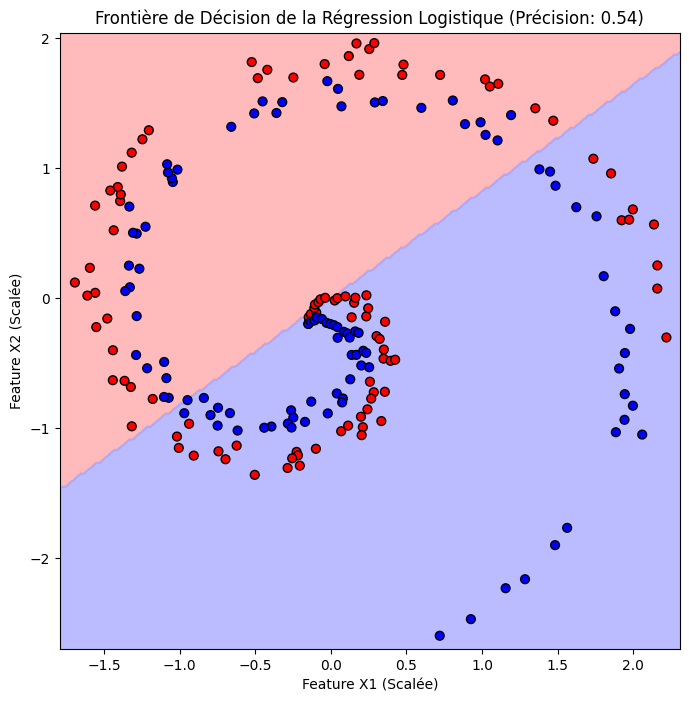

In [12]:
# 1. Définition de la grille pour la frontière de décision
h = 0.02
x_min, x_max = X_spiral_scaled[:, 0].min() - 0.1, X_spiral_scaled[:, 0].max() + 0.1
y_min, y_max = X_spiral_scaled[:, 1].min() - 0.1, X_spiral_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 2. Prédiction sur la grille
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3. Affichage
cmap_boundary = ListedColormap(['#FFAAAA', '#AAAAFF']) # Couleurs pour les régions de prédiction

plt.figure(figsize=(8, 8))
# Affichage des régions de prédiction
plt.contourf(xx, yy, Z, cmap=cmap_boundary, alpha=0.8)

# Affichage des points de données réels
plt.scatter(X_spiral_scaled[:, 0], X_spiral_scaled[:, 1], c=y_spiral, s=40,
            cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')

plt.title(f"Frontière de Décision de la Régression Logistique (Précision: {accuracy_linear:.2f})")
plt.xlabel("Feature X1 (Scalée)")
plt.ylabel("Feature X2 (Scalée)")
plt.show()